# Домашнє завдання: Візуалізація даних з Pandas

## Опис завдання
У цьому домашньому завданні ви працюватимете з датасетом про оренду велосипедів `yulu_rental.csv`. Датасет містить інформацію про кількість орендованих велосипедів залежно від погодних умов, сезону та інших факторів.
Набір даних взяти з Kaggle. Посилання на оригінальний [опис](https://www.kaggle.com/datasets/ranitsarkar01/yulu-bike-sharing-data?select=yulu_bike_sharing_dataset.csv).

**Опис колонок:**
- `datetime` - дата та час
- `season` - квартал (1-Q1, 2-Q2, 3-Q3, 4-Q4)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів



---
🌱 Коментар щодо сезонності

Колонка season у датасеті представляє саме квартали року, а не метеорологічні сезони. Тому всі аналізи сезонності ви можете будувати на основі кварталів.

Водночас дані були зібрані в Індії, де поділ на сезони інший, ніж у Європі чи США. Якщо ви хочете дослідити сезонність відповідно до індійської системи сезонів, можна створити окрему колонку.


Справжні сезони в Індії:

| Сезон        | Місяці                     |
| ------------ | -------------------------- |
| Winter       | December–February (12,1,2) |
| Summer       | March–May (3,4,5)          |
| Monsoon      | June–September (6,7,8,9)   |
| Post-monsoon | October–November (10,11)   |


Тоді потрібно зробити нову колонку weather_season_india, мапнувши місяці так:

12, 1, 2 → 1 (Winter)

3, 4, 5 → 2 (Summer)

6–9 → 3 (Monsoon)

10–11 → 4 (Post-Monsoon)

## Підготовка даних


In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Завантаження даних
df = pd.read_csv(r"C:\Users\limon.DESKTOP-D4OD6GD\OneDrive\Desktop\Навчання\python\yulu_bike_sharing_dataset.csv")

In [13]:
# Перетворення datetime у правильний формат
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Додамо додаткові колонки для аналізу
df['date'] = df.index.date
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['weekday_num'] = df.index.weekday
df['weekday'] = df.index.day_name()
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour

## Завдання 0: Перегляд даних
**Завдання:**
Перегляньте дані, їх розмір, та напишіть висновок:
- скільки даних в наборі
- який рівень деталізації мають ці дані, тобто за який період міститься дані в одному рядку даних ?

In [14]:
df.shape


(10886, 19)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10886 entries, 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       10886 non-null  int64  
 1   holiday      10886 non-null  int64  
 2   workingday   10886 non-null  int64  
 3   weather      10886 non-null  int64  
 4   temp         10886 non-null  float64
 5   atemp        10886 non-null  float64
 6   humidity     10886 non-null  int64  
 7   windspeed    10886 non-null  float64
 8   casual       10886 non-null  int64  
 9   registered   10886 non-null  int64  
 10  count        10886 non-null  int64  
 11  date         10886 non-null  object 
 12  day          10886 non-null  int32  
 13  week         10886 non-null  UInt32 
 14  weekday_num  10886 non-null  int32  
 15  weekday      10886 non-null  object 
 16  year         10886 non-null  int32  
 17  month        10886 non-null  int32  
 18  hour       

In [16]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,day,week,weekday_num,weekday,year,month,hour
datetime,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,1,52,5,Saturday,2011,1,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,1,52,5,Saturday,2011,1,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,1,52,5,Saturday,2011,1,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,1,52,5,Saturday,2011,1,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,1,52,5,Saturday,2011,1,4


## Завдання 1: Базовий лінійний графік

**Завдання:**
1. Згрупуйте дані про кількість орендованих велосипедів (`count`) поденно.
2. Побудуйте з методом `DataFrame.plot()` лінійний графік поденної кількості орендованих велосипедів (`count`) за весь період в даних.
3. Налаштуйте розмір графіка (12x6), додайте заголовок "Динаміка оренди велосипедів" та сітку.
4. Дайте відповіді на питання по цьому графіку. Якщо треба - проведіть додаткові програмні операції для відповідей.

**Питання для інтерпретації:**
1. Як гадаєте, чому графік має "заломи", чим це спричинено і як ви б могли прибрати заломи?
2. Які загальні тенденції ви бачите на графіку?
3. Чи помітні якісь сезонні коливання?
4. Чи є періоди з аномально високими або низькими значеннями і чому на ваш погляд можуть бути ці аномалії?


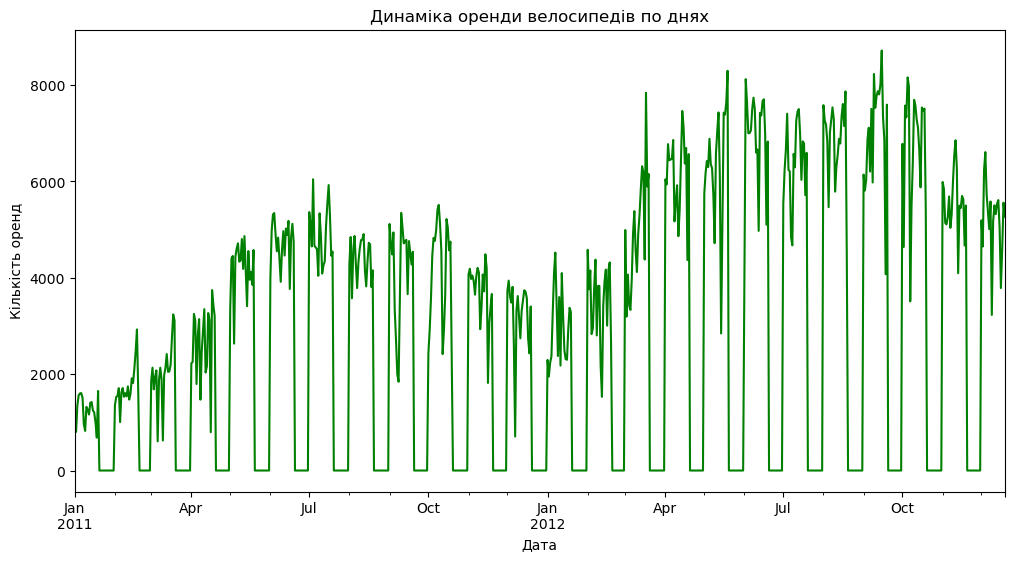

In [36]:
daily_counts = df['count'].resample('D').sum()

daily_counts.plot(
    figsize=(12,6),
    color=['green'],
    title='Динаміка оренди велосипедів по днях'
)

plt.xlabel('Дата')
plt.ylabel('Кількість оренд')
plt.show()

1. Зломи на графіку відбуваються в наслідок:
- різниця між будніми та вихідними
- погодні умови
- сезонність
2. Тенеденція зломів графік напряму залежить від сезону.
3. Так помітні, попит збільшується в літній пперіод та зменшується в зимовий.
4. Ті вертикальні провали вниз через регулярні проміжки часу — це не нормальна поведінка попиту.
У реальному житті оренда велосипедів не падає до нуля раптово на один день.

Можливі причини:
- пропущені записи в даних
- технічні збої збору даних
- дні без вимірювань (а не без оренд)

## Завдання 3: Динаміка за місяцями (Line Plot)

**Завдання:**
Створіть лінійний графік середньої кількості оренди велосипедів по місяцях (тобто групування в рамках місяця і беремо середню кількість оренд в цей місяць з кількох років). Використайте маркери-кружечки для точок, додайте сітку та пофарбуйте лінію у червоний колір.

Просунуте доповнення:
- додайте аби по осі ОХ поділки були чітко на кожен окремий місяць по одній. Тобто сумарно 12 поділок.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які місяці спостерігається пік та спад оренди?
2. Чи збігається ця закономірність з результатами з попереднього завдання?
3. Як може вплинути клімат на оренду велосипедів протягом року?


In [40]:
monthly_avg = df.groupby(df.index.month)['count'].mean()


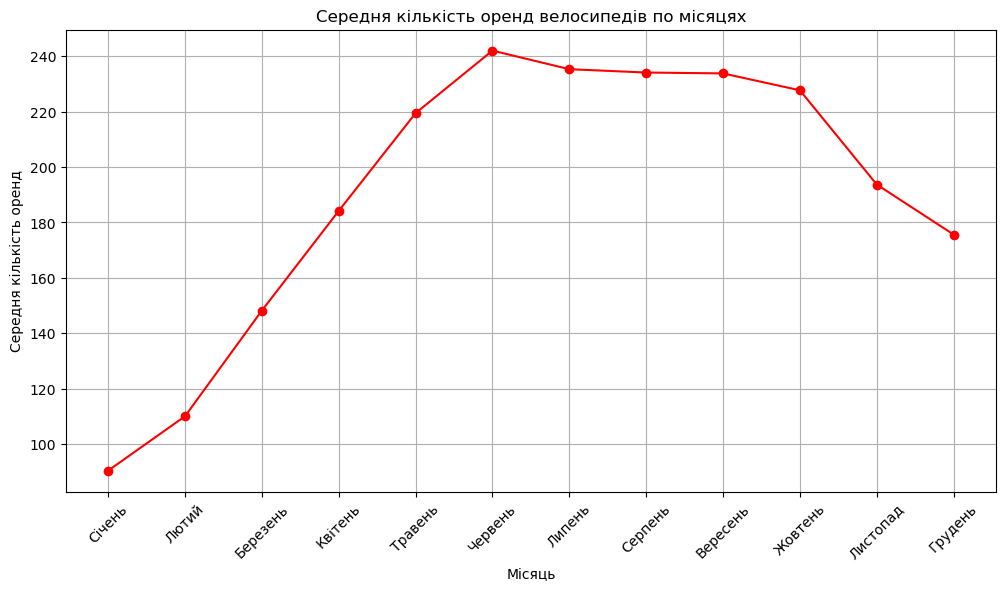

In [43]:
months = [
    'Січень','Лютий','Березень','Квітень','Травень','Червень',
    'Липень','Серпень','Вересень','Жовтень','Листопад','Грудень'
]

plt.figure(figsize=(12,6))

monthly_avg.plot(
    color='red',
    marker='o'
)

plt.xticks(range(1,13), months, rotation=45)
plt.grid(True)

plt.xlabel('Місяць')
plt.ylabel('Середня кількість оренд')
plt.title('Середня кількість оренд велосипедів по місяцях')

plt.show()

1. Пік оренди:
травень – серпень (максимум припадає приблизно на червень–липень)
Найменший попит:
 січень – лютий (також низький у грудні)
 2. Так збігається високі значення в теплі місяці та різкі спади взимку.
 3. Клімат має прямий і сильний вплив:
- тепла суха погода → більше оренд
- холод, дощ, сніг → різке зменшення попиту
Причини:
- комфорт пересування
- безпека
- сезонний стиль життя

## Завдання 4: Розподіл погодних умов (Pie Chart)

**Завдання:**
1. Побудуйте кругову діаграму з часткою записів за погодними умовами
2. Додайте підписи з відсотками та легенду з описами погоди (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ).
3. Визначте свої відмінні від стандартних кольори для відображення кожної категорії.
4. Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. Яка погода переважає в датасеті?
2. Чи є дні із сильним дощем? Яка їх частка?
3. Як ви думаєте, як погодні умови впливають на попит на оренду велосипедів?

In [54]:
weather_counts = df['weather'].value_counts().sort_index()
weather_counts

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64

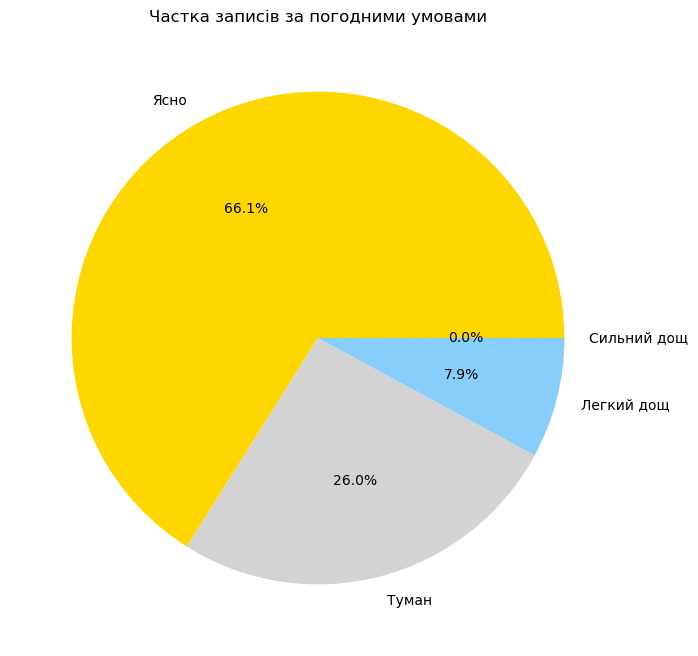

In [55]:
labels = ['Ясно', 'Туман', 'Легкий дощ', 'Сильний дощ']
colors = ['gold', 'lightgray', 'lightskyblue', 'steelblue']

weather_counts.plot.pie(
    autopct='%1.1f%%',
    labels=labels,
    colors=colors,
    figsize=(8,8),
    title='Частка записів за погодними умовами'
)

plt.ylabel('')
plt.show()

1. В датасеті переважає ясна погода.
2. Дні з сильним дощем відсутні.
3. Погодні умови напряму впливають на оренду велосипедів, чим краща та сприятливіша погода тим більший попит.


    Колір в Pie Chart змінив тому, що сірий мені більше асоціюється з туманом)


Очікуваний результат:

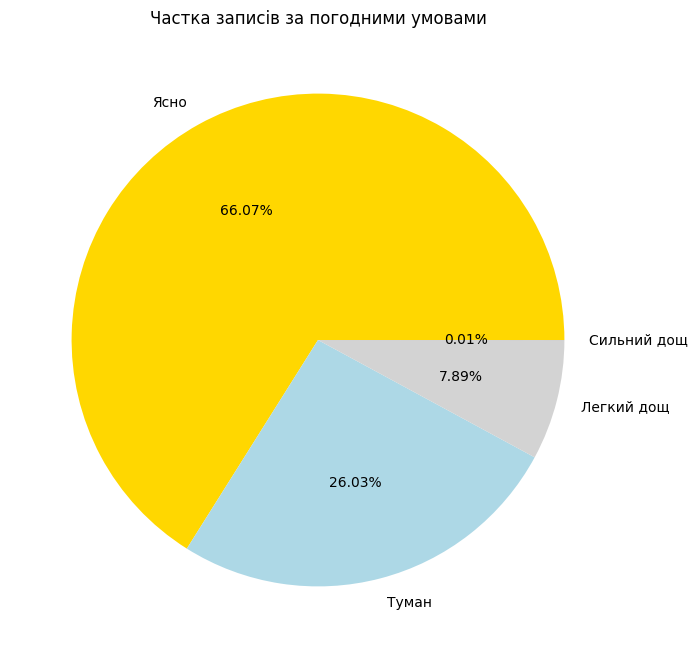

In [56]:
df


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,day,week,weekday_num,weekday,year,month,hour
datetime,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011-01-01,1,52,5,Saturday,2011,1,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011-01-01,1,52,5,Saturday,2011,1,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011-01-01,1,52,5,Saturday,2011,1,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011-01-01,1,52,5,Saturday,2011,1,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011-01-01,1,52,5,Saturday,2011,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012-12-19,19,51,2,Wednesday,2012,12,19
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012-12-19,19,51,2,Wednesday,2012,12,20
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012-12-19,19,51,2,Wednesday,2012,12,21


## Завдання 5: Box Plot для аналізу викидів

**Завдання:**
Створіть коробковий графік (box plot) кількості орендованих велосипедів для кожного типу погоди.

Просунуте доповнення:
- Використайте горизонтальну орієнтацію.
- Позначте погодні умови не числом, а назвою на візуалізації.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. При якій погоді найбільший розкид у кількості оренди?
2. Чи є викиди (outliers) в даних? При якій погоді?
3. При якій погоді медіанне значення оренди найвище?

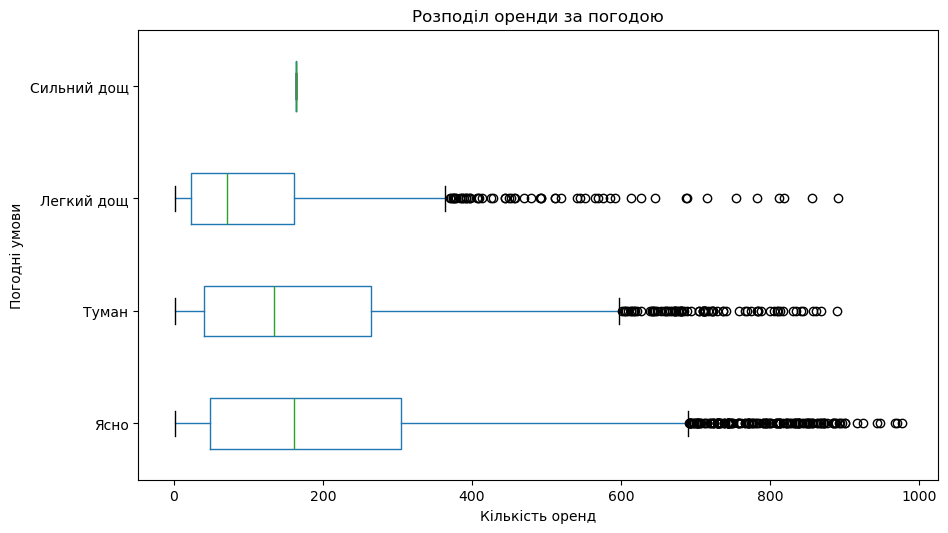

In [61]:
labels = ['Ясно', 'Туман', 'Легкий дощ', 'Сильний дощ']

ax = df.boxplot(
    column='count',
    by='weather',
    vert=False,
    figsize=(10,6),
    grid=False
)

ax.set_yticklabels(labels)

plt.title('Розподіл оренди за погодою')
plt.xlabel('Кількість оренд')
plt.ylabel('Погодні умови')
plt.suptitle('')
plt.show()

1. Найбільший розкид оренд:
За ясної погоди:
- багато користувачів
- великий діапазон від низьких до дуже високих значень
2. Так, особливо при:
• ясній погоді
• легкому дощі
Це дні з аномально високою кількістю оренд (ймовірно ідеальна погода, події тощо)
3. Найвища медіана:
 Ясна погода

Тобто в середньому люди орендують найбільше саме в гарну погоду.

## Завдання 6: Кореляція температури та оренди (Scatter Plot)

**Завдання:**
Побудуйте діаграму розсіювання залежності між температурою (`temp`) та загальною кількістю оренди (`count`). Розфарбуйте точки за сезонами, додайте напівпрозорість (alpha=0.6).

**Увага!** За замовченням буде колір

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
- Чи є зв'язок між температурою та кількістю оренди? Який?

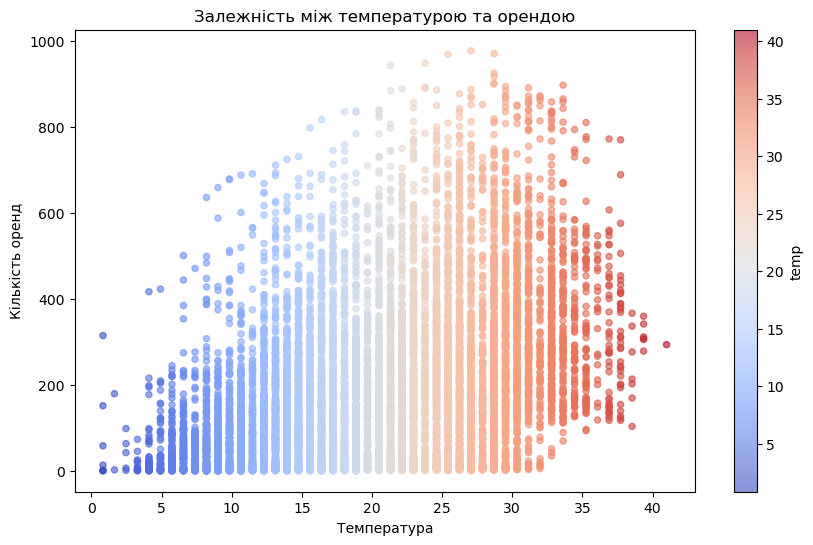

In [66]:
df.plot.scatter(
    x='temp',
    y='count',
    c='temp',
    cmap='coolwarm',
    alpha=0.6,
    figsize=(10,6),
    title='Залежність між температурою та орендою'
)

plt.xlabel('Температура')
plt.ylabel('Кількість оренд')
plt.show()

1. Так — позитивна кореляція.

Чим вища температура - тим більше оренд.

## (Опціонально) Завдання 7: Порівняння користувачів (Stacked Bar Chart)

**Завдання:**
Ми хочемо дізнатись як по дням тижня беруть в середньому в оренду велосипеди випадкові і зареєстровані користувачі.

Створіть стовпчасту діаграму з накопиченням (bar з налаштуванням `stacked=True`), яка показує співвідношення випадкових (`casual`) та зареєстрованих (`registered`) користувачів по днях тижня за кількістю взятих ними велосипедів в оренду в середньому. Використайте різні кольори для типів користувачів.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які дні тижня більше оренд від зареєстрованих користувачів?
2. Як ви можете пояснити таку різницю в поведінці користувачів протягом тижня?

In [85]:
weekly_users = df.groupby('weekday')[['casual', 'registered']].mean()

In [86]:
days = ['Пн','Вт','Ср','Чт','Пт','Сб','Нд']
weekly_users.index = days

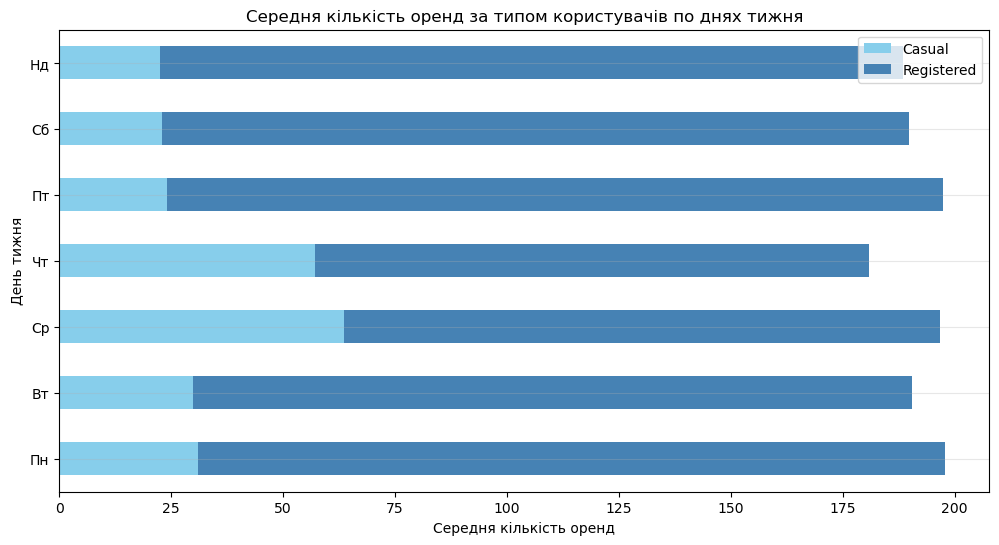

In [83]:
weekly_users.plot(
    kind='barh',
    stacked=True,
    figsize=(12,6),
    color=['skyblue', 'steelblue']
)

plt.title('Середня кількість оренд за типом користувачів по днях тижня')
plt.xlabel('Середня кількість оренд')
plt.ylabel('День тижня')
plt.grid(axis='y', alpha=0.3)
plt.legend(['Casual', 'Registered'])
plt.show()

1. Більше оернд від зареєстрованих клієнтів в будні дні.
2. На мою думку зареєстровані користувачі користуються частіше тобто це їх звичний стиль життя, часто можуть навіть використовувати як транспорт для добирання на роботу.
А не зареєстровані клієнти це зазвичай активний відпочинок, туризм, дозвілля тут більше спонтанність.
